In [0]:
import urllib.request
print('Beginning file download...')
url = 'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip'
urllib.request.urlretrieve(url, './traffic-signs-data.zip')

Beginning file download...


('./traffic-signs-data.zip', <http.client.HTTPMessage at 0x7ff31e2106a0>)

In [0]:
import zipfile
import os
print('Beginning file unzip')
zip_ref = zipfile.ZipFile('./traffic-signs-data.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()
print('Done')
os.listdir("./")

Beginning file unzip
Done


['.config',
 'traffic-signs-data.zip',
 'valid.p',
 'train.p',
 'test.p',
 'sample_data']

In [0]:
# Load pickled data
import pickle
# TODO: Fill this in based on where you saved the training and testing data
training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
import numpy as np
import pandas as pd
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
n_train = X_train.shape[0]
# TODO: Number of validation examples
n_validation = X_valid.shape[0]
# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


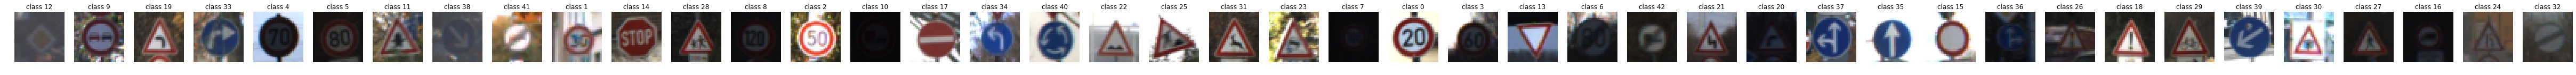

In [0]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    
    n_images = len(images)
    
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    
    fig = plt.figure(figsize=(2, 2))
    
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        a.grid(False)
        a.axis('off')
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image, cmap='gray')
        a.set_title(title)
    
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
def select_random_images_by_classes(features, labels, n_features):
  
  indexes = []
  _classes = np.unique(labels);
  
  while len(indexes) < len(_classes):
  
    index = random.randint(0, n_features-1)
    _class = labels[index]
    for i in range(0, len(_classes)):
      if _class == _classes[i]:
        _classes[i] = -1
        indexes.append(index)
        break
  images = []
  titles = []
  for i in range(0, len(indexes)):
    images.append(features[indexes[i]])
    titles.append("class " + str(labels[indexes[i]]))
  show_images(images, titles = titles)
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
select_random_images_by_classes(X_train, y_train, n_train)

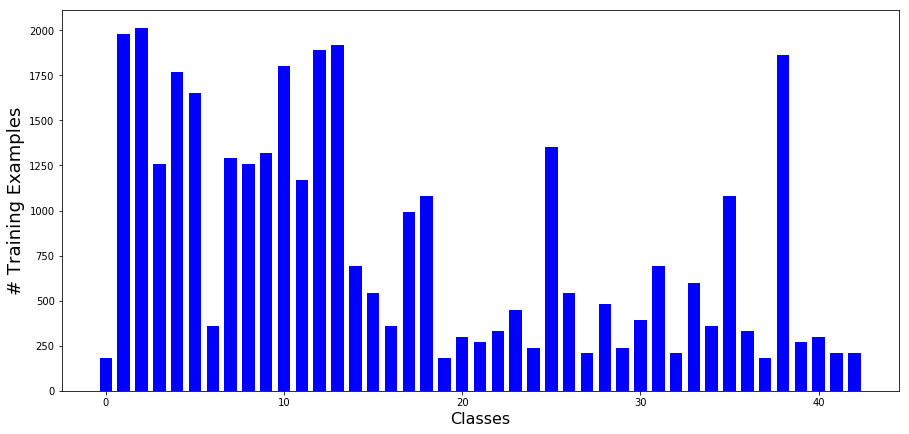

In [0]:
def plot_distribution_chart(x, y, xlabel, ylabel, width, color):
  
  plt.figure(figsize=(15,7))
  plt.ylabel(ylabel, fontsize=18)
  plt.xlabel(xlabel, fontsize=16)
  plt.bar(x, y, width, color=color)
  plt.show()
_classes, counts = np.unique(y_train, return_counts=True)
plot_distribution_chart(_classes, counts, 'Classes', '# Training Examples', 0.7, 'blue')

In [0]:
import cv2
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1
def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.
    A Random uniform distribution is used to generate different parameters for transformation
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    # Brightness
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    if brightness == 1:
      img = augment_brightness_camera_images(img)
    return img

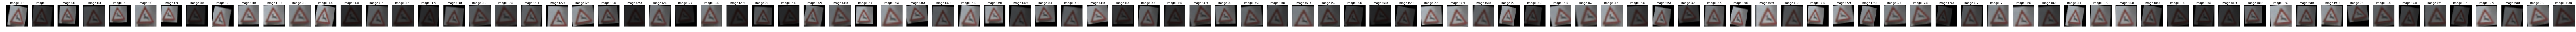

In [0]:
images = []
for i in range(0, 100):
  images.append(transform_image(X_train[555],10,5,5,brightness=1))
show_images(images)

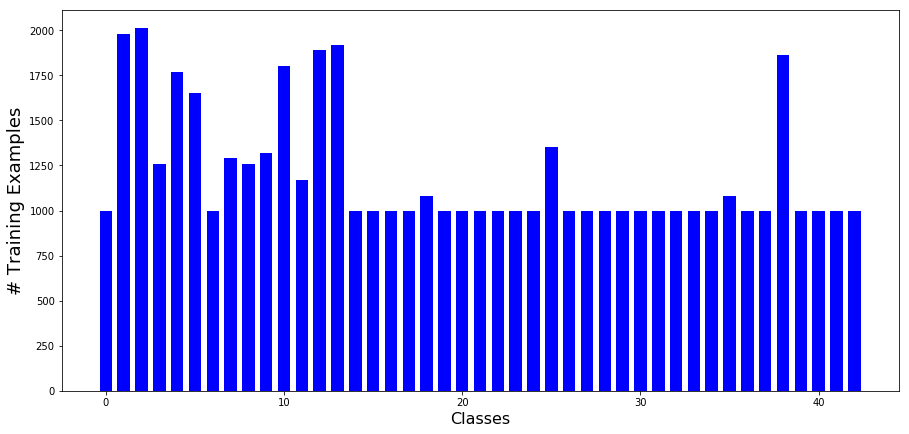

In [0]:
for _class, count in zip(_classes, counts):
  new_images = []
  new_classes = []
  
  if count < 1000:
    y_train_length = y_train.shape[0]
    index = 0
    
    for i in range(0, 1000-count):
      while y_train[index] != _class:
        index = random.randint(0, y_train_length-1)
      new_images.append(transform_image(X_train[index],10,5,5,brightness=1))
      new_classes.append(_class)
      
    X_train = np.concatenate((X_train, np.array(new_images)))
    y_train = np.concatenate((y_train, np.array(new_classes)))
    
_classes, counts = np.unique(y_train, return_counts=True)
plot_distribution_chart(_classes, counts, 'Classes', '# Training Examples', 0.7, 'blue')

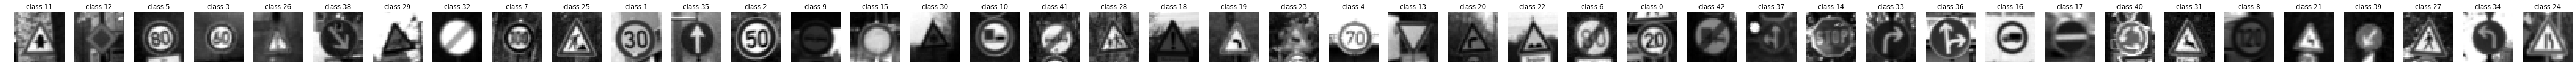

In [0]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
# check grayscale images
select_random_images_by_classes(X_train_gray.squeeze(), y_train, n_train)

In [0]:
X_train_gray -= np.mean(X_train_gray)
X_test_gray -= np.mean(X_test_gray)
X_train = X_train_gray
X_test = X_test_gray

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
X_train, y_train = shuffle(X_train, y_train)

In [0]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
EPOCHS = 100
BATCH_SIZE = 128
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [0]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [0]:
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

W0709 14:20:10.091347 140682727729024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/layers/python/layers/layers.py:1634: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.
W0709 14:20:10.593554 140682727729024 deprecation.py:323] From <ipython-input-15-d575217325a2>:3: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.821

EPOCH 2 ...
Validation Accuracy = 0.908

EPOCH 3 ...
Validation Accuracy = 0.937

EPOCH 4 ...
Validation Accuracy = 0.951

EPOCH 5 ...
Validation Accuracy = 0.953

EPOCH 6 ...
Validation Accuracy = 0.961

EPOCH 7 ...
Validation Accuracy = 0.946

EPOCH 8 ...
Validation Accuracy = 0.969

EPOCH 9 ...
Validation Accuracy = 0.967

EPOCH 10 ...
Validation Accuracy = 0.964

EPOCH 11 ...
Validation Accuracy = 0.964

EPOCH 12 ...
Validation Accuracy = 0.973

EPOCH 13 ...
Validation Accuracy = 0.966

EPOCH 14 ...
Validation Accuracy = 0.967

EPOCH 15 ...
Validation Accuracy = 0.976

EPOCH 16 ...
Validation Accuracy = 0.966

EPOCH 17 ...
Validation Accuracy = 0.967

EPOCH 18 ...
Validation Accuracy = 0.977

EPOCH 19 ...
Validation Accuracy = 0.970

EPOCH 20 ...
Validation Accuracy = 0.979

EPOCH 21 ...
Validation Accuracy = 0.980

EPOCH 22 ...
Validation Accuracy = 0.975

EPOCH 23 ...
Validation Accuracy = 0.969

EPOCH 24 ...
Validation Accura

In [24]:
from google.colab import files
uploaded = files.upload()

Saving im4.png to im4.png
Saving im5.png to im5.png


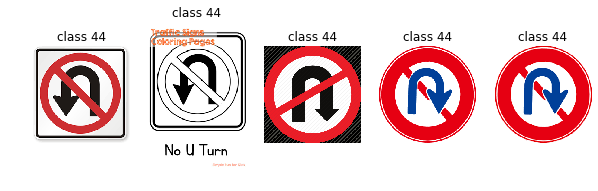

In [25]:
import glob
import cv2
images = sorted(glob.glob('./*.png'))
labels = np.array([44, 44,44,44,44])
X_images_test = []
titles = []
for image, label in zip(images, labels):
    img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    X_images_test.append(img)
    titles.append("class " + str(label))
show_images(X_images_test, titles=titles)
images = np.array(X_images_test)
X_images_test = np.array(X_images_test)
#X_images_test_gray = np.sum(X_images_test/3, axis=1, keepdims=True)
#X_images_test_gray -= np.mean(X_images_test_gray)
#X_images_test = X_images_test_gray

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    
    accuracy = evaluate(X_images_test, labels)
    
    print("Accuracy = " + str(accuracy*100) + "%")

W0709 14:24:43.040284 140682727729024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


ZeroDivisionError: ignored

In [0]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_images_test})
    my_top_k = sess.run(top_k, feed_dict={x: X_images_test})
    
    fig, axs = plt.subplots(len(images),4, figsize=(12, 14))
    axs = axs.ravel()
    
    for i, image in enumerate(images):
        axs[4*i].axis('off')
        axs[4*i].imshow(image)
        axs[4*i].set_title('Original')
        
        for j in range(3):
          guess = my_top_k[1][i][j]
          index = np.argwhere(y_validation == guess)[0]
          axs[4*i+j+1].axis('off')
          axs[4*i+j+1].imshow(X_validation[index].squeeze(), cmap='gray')
          axs[4*i+j+1].set_title('top guess: {} ({:.0f}%)'.format(guess, 100*my_top_k[0][i][j]))